In [5]:
from dotenv import load_dotenv
import os
import sys
from pathlib import Path
project_root = Path().resolve().parent.parent  
sys.path.append(str(project_root))

In [6]:
from langgraph.graph import StateGraph,END,START
from backend.model.states.GraphState import GraphState
from backend.nodes.chat_agent import chat_agent
from IPython.display import Image, display

In [7]:

from backend.nodes.rag_agent import rag_agent
from backend.nodes.rag_retrieval_node import rag_retrieval_node
from backend.pipeline.get_pdf_ready_pipeline import get_pdf_ready_pipeline
from backend.pipeline.rag_router import rag_router

def get_graph(state:GraphState)->GraphState:
    graph = StateGraph(GraphState)

    graph.add_node("get_pdf_ready_pipeline", get_pdf_ready_pipeline)
    graph.add_node("router", lambda state: state)
    graph.add_node("rag_agent", rag_agent)
    graph.add_node("chat_agent", chat_agent)

    graph.add_edge(START, "chat_agent")
    graph.add_edge("chat_agent", "router")
    graph.add_edge("get_pdf_ready_pipeline", "rag_agent")
    graph.add_conditional_edges(
        "router",
        rag_router,
        {
            "TRUE": "get_pdf_ready_pipeline",
            "FALSE": "chat_agent",
        },
    )

    graph.set_entry_point("chat_agent")

    app= graph.compile()
    display(Image(app.get_graph().draw_mermaid_png()))

    return app


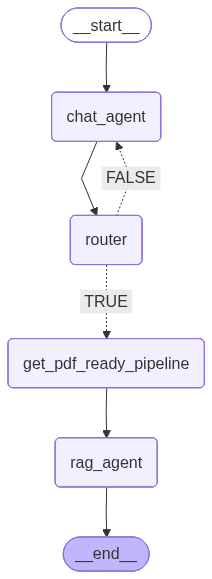

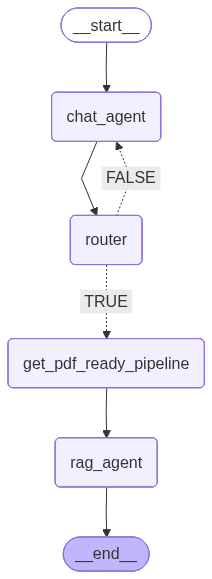

In [8]:
load_dotenv()
PDF_PATH = os.getenv("PDF_PATH")
PDF_NAME = os.getenv("PDF_PATH")


state = GraphState()
state.pdf.pdf_path = PDF_PATH
get_graph(state)